In [1]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,student_id,name,cgpa,skills,certifications,attendance,internship,placement,job_role
0,1001,Swathi N,9.1,"SQL, Python, HTML, C++","None, Web Dev Cert",94%,No,No,NaN
1,1002,Rahul S,9.1,"Tableau, Power BI, Excel",Excel,99%,No,No,NaN
2,1003,Anjali L,8.1,"SQL, Tableau, HTML, Excel","ML Cert, Web Dev Cert",77%,No,Yes,Software Engineer
3,1004,Rahul N,9.8,"CSS, JavaScript, Java",Web Dev Cert,68%,No,No,NaN
4,1005,Rohan K,6.1,"Power BI, JavaScript, Tableau, SQL",Web Dev Cert,93%,No,No,NaN


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\mbeni\AppData\Local\Temp\ipykernel_14100\48655272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='placement', palette='pastel')


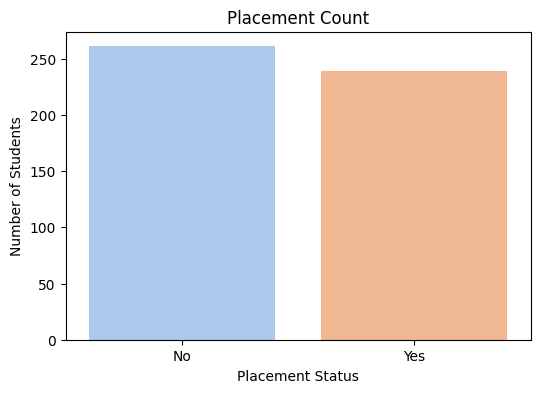

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='placement', palette='pastel')
plt.title("Placement Count")
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")
plt.show()

C:\Users\mbeni\AppData\Local\Temp\ipykernel_14100\4274865863.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cert_df, x='Count', y='Certification', palette='mako')


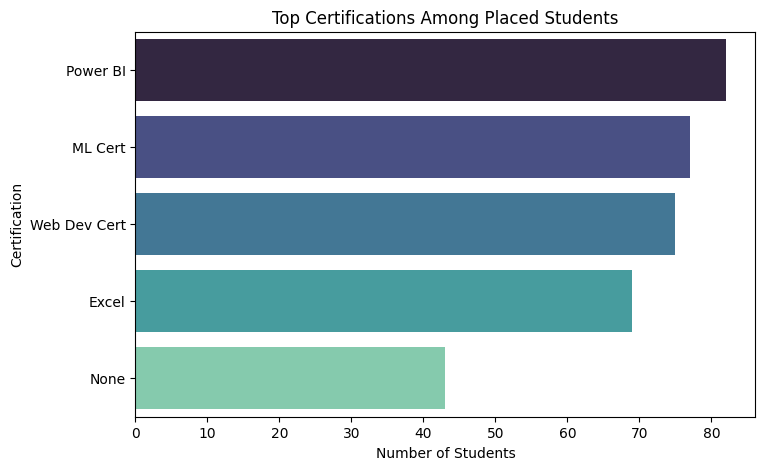

In [5]:
# Filter data: only placed students
placed = df[df['placement'] == 'Yes']

# Combine all certifications into one big list
from collections import Counter

all_certs = []
for certs in placed['certifications'].dropna():
    for cert in certs.split(','):
        all_certs.append(cert.strip())

# Count certifications
cert_counts = Counter(all_certs)

# Convert to DataFrame for plotting
cert_df = pd.DataFrame(cert_counts.items(), columns=['Certification', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=cert_df, x='Count', y='Certification', palette='mako')
plt.title("Top Certifications Among Placed Students")
plt.xlabel("Number of Students")
plt.ylabel("Certification")
plt.show()


C:\Users\mbeni\AppData\Local\Temp\ipykernel_14100\1114057737.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df, x='Count', y='Skill', palette='viridis')


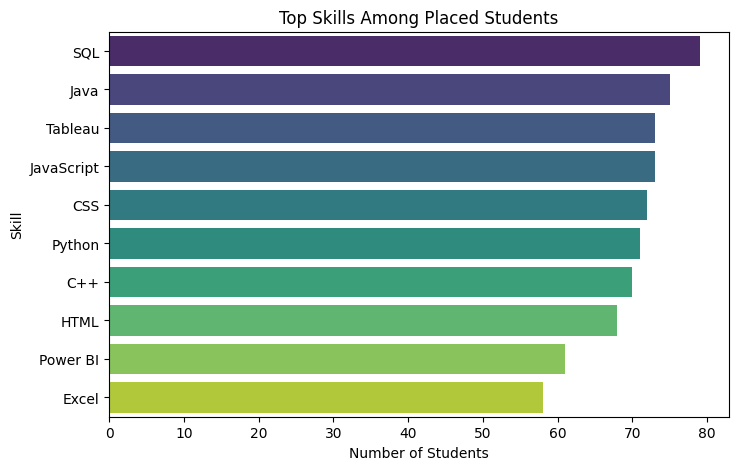

In [6]:
# Combine all skills of placed students
all_skills = []
for skillset in placed['skills'].dropna():
    for skill in skillset.split(','):
        all_skills.append(skill.strip())

# Count them
from collections import Counter
skill_counts = Counter(all_skills)

# Convert to DataFrame
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=skill_df, x='Count', y='Skill', palette='viridis')
plt.title("Top Skills Among Placed Students")
plt.xlabel("Number of Students")
plt.ylabel("Skill")
plt.show()


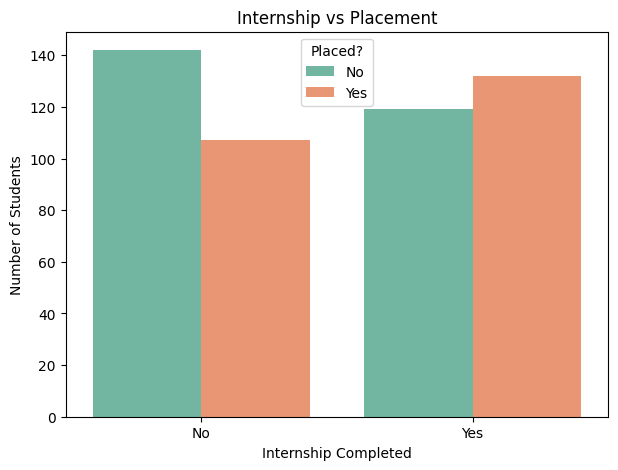

In [7]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='internship', hue='placement', palette='Set2')

plt.title("Internship vs Placement")
plt.xlabel("Internship Completed")
plt.ylabel("Number of Students")
plt.legend(title="Placed?")
plt.show()


In [8]:
# Define CGPA categories
def categorize_cgpa(cgpa):
    if cgpa >= 9:
        return 'Excellent (9-10)'
    elif cgpa >= 8:
        return 'Very Good (8-8.9)'
    elif cgpa >= 7:
        return 'Good (7-7.9)'
    elif cgpa >= 6:
        return 'Average (6-6.9)'
    else:
        return 'Low (<6)'

# Create new column
df['cgpa_range'] = df['cgpa'].apply(categorize_cgpa)

# Check the new column
df[['cgpa', 'cgpa_range']].head()


,cgpa,cgpa_range
0,9.1,Excellent (9-10)
1,9.1,Excellent (9-10)
2,8.1,Very Good (8-8.9)
3,9.8,Excellent (9-10)
4,6.1,Average (6-6.9)


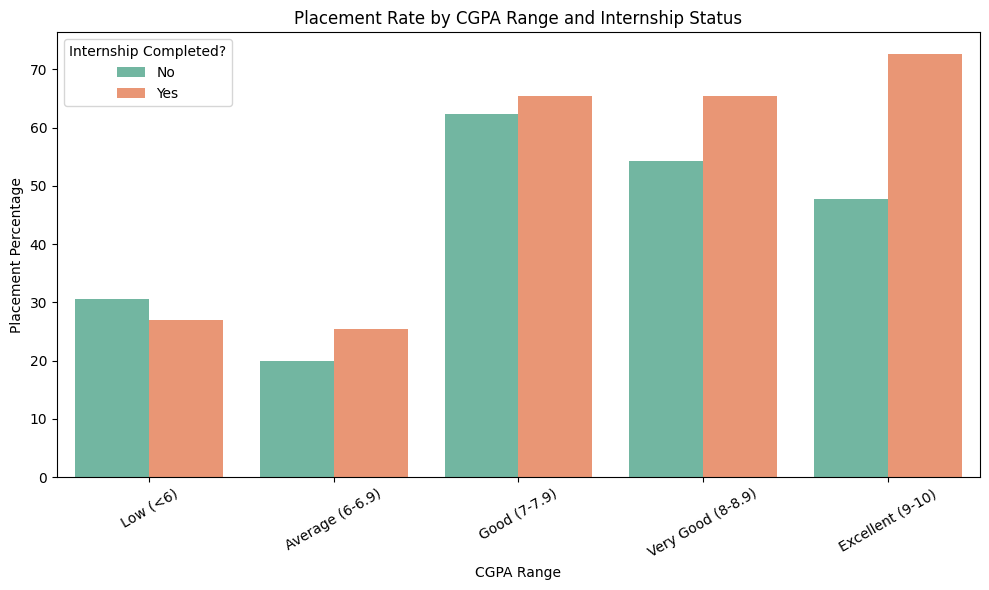

In [12]:
# Group by CGPA range and internship, then count placements
grouped = df.groupby(['cgpa_range', 'internship', 'placement']).size().reset_index(name='count')

# Pivot table for easy plotting
pivot = grouped.pivot_table(index=['cgpa_range', 'internship'], columns='placement', values='count', fill_value=0)

# Calculate placement rate
pivot['Placement %'] = pivot['Yes'] / (pivot['Yes'] + pivot['No']) * 100

# Reset for plotting
pivot = pivot.reset_index()
# Define custom order for CGPA ranges
cgpa_order = ['Low (<6)', 'Average (6-6.9)', 'Good (7-7.9)', 'Very Good (8-8.9)', 'Excellent (9-10)']
pivot['cgpa_range'] = pd.Categorical(pivot['cgpa_range'], categories=cgpa_order, ordered=True)

# Sort based on the custom order
pivot = pivot.sort_values('cgpa_range')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot, x='cgpa_range', y='Placement %', hue='internship', palette='Set2')

plt.title("Placement Rate by CGPA Range and Internship Status")
plt.xlabel("CGPA Range")
plt.ylabel("Placement Percentage")
plt.legend(title="Internship Completed?")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [10]:
# Define custom order for CGPA ranges
cgpa_order = ['Low (<6)', 'Average (6-6.9)', 'Good (7-7.9)', 'Very Good (8-8.9)', 'Excellent (9-10)']
pivot['cgpa_range'] = pd.Categorical(pivot['cgpa_range'], categories=cgpa_order, ordered=True)

# Sort based on the custom order
pivot = pivot.sort_values('cgpa_range')


In [13]:
df.to_csv("edupath_clean.csv", index=False)